In [1]:
#!pip install python-dateutil

In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import sqlalchemy as sql

In [4]:
import datetime as dt

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import sys
import json
import csv
import datetime
from datetime import timedelta
from datetime import datetime
from dateutil.parser import parse
from sqlalchemy import func

# Output File (CSV)
output_data_file = "climate_yr.csv"

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [7]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
#DELETE BEFORE SUBMITTING FINAL VERSION
inspector = inspect(engine)

In [9]:
#DELETE BEFORE SUBMITTING FINAL VERSION
inspector.get_table_names()

['measurement', 'station']

In [10]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [11]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [12]:
#DELETE BEFORE SUBMITTING FINAL VERSION
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
#DELETE BEFORE SUBMITTING FINAL VERSION
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [14]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [15]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Exploratory Climate Analysis

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

In [17]:
#DELETE BEFORE SUBMITTING FINAL VERSION
# Print all of the player names in the database
sta = session.query(Station)
for s in sta:
   # print(s.station, s.name, s.latitude, s.longitude, s.elevation)
    print(s.station, s.name)

USC00519397 WAIKIKI 717.2, HI US
USC00513117 KANEOHE 838.1, HI US
USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US
USC00517948 PEARL CITY, HI US
USC00518838 UPPER WAHIAWA 874.3, HI US
USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US
USC00519281 WAIHEE 837.5, HI US
USC00511918 HONOLULU OBSERVATORY 702.2, HI US
USC00516128 MANOA LYON ARBO 785.2, HI US


In [18]:
#DELETE BEFORE SUBMITTING FINAL VERSION
# Print all of the player names in the database
meas = session.query(Measurement)
#for m in meas:
#    print(m.station, m.date, m.prcp, m.tobs)

In [19]:
#DELETE BEFORE SUBMITTING FINAL VERSION
rain = []
x =[]
results = session.query(Measurement).filter(Measurement.date == '2016-01-01')
for d in results:
    x = d.station, d.date, d.prcp, d.tobs
    rain.append(x)
    print(d.station, d.date, d.prcp, d.tobs)

USC00519397 2016-01-01 0.0 62.0
USC00513117 2016-01-01 0.02 63.0
USC00514830 2016-01-01 0.0 73.0
USC00519523 2016-01-01 0.0 64.0
USC00519281 2016-01-01 0.02 74.0
USC00516128 2016-01-01 0.0 73.0


In [20]:
#DELETE BEFORE SUBMITTING FINAL VERSION
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
db_last_date = last_date[0]
print(db_last_date)

2017-08-23


In [21]:
#DELETE BEFORE SUBMITTING FINAL VERSION
rf = datetime.strptime(db_last_date, '%Y-%m-%d').date()
print(rf)

2017-08-23


In [22]:
#DELETE BEFORE SUBMITTING FINAL VERSION
nd = rf - timedelta(days=365)
print(nd)

2016-08-23


In [23]:
#DELETE BEFORE SUBMITTING FINAL VERSION
year = timedelta(days=365)

In [24]:
# Calculate the date 1 year ago from the last data point in the database
# Query for last date
end_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(end_date)

# Extracting just the last date from the returned list 'end_date'
last_date = end_date[0]
print(last_date)

# Converting string to datetime format
rf = datetime.strptime(last_date, '%Y-%m-%d').date()
print(rf)

# Subtracting 365 days
rng_start_date = rf - timedelta(days=365)
print(rng_start_date)

sd = str(rng_start_date)

('2017-08-23',)
2017-08-23
2017-08-23
2016-08-23


In [25]:
#DELETE BEFORE SUBMITTING FINAL VERSION
#WHERE I STOPPED - Uncomment produces long printout

q = session.query(Measurement).join(Station, Station.station==Measurement.station)
for j in q:
    print(j.station, j.date, j.prcp, j.tobs)



USC00519397 2010-01-01 0.08 65.0
USC00519397 2010-01-02 0.0 63.0
USC00519397 2010-01-03 0.0 74.0
USC00519397 2010-01-04 0.0 76.0
USC00519397 2010-01-06 None 73.0
USC00519397 2010-01-07 0.06 70.0
USC00519397 2010-01-08 0.0 64.0
USC00519397 2010-01-09 0.0 68.0
USC00519397 2010-01-10 0.0 73.0
USC00519397 2010-01-11 0.01 64.0
USC00519397 2010-01-12 0.0 61.0
USC00519397 2010-01-14 0.0 66.0
USC00519397 2010-01-15 0.0 65.0
USC00519397 2010-01-16 0.0 68.0
USC00519397 2010-01-17 0.0 64.0
USC00519397 2010-01-18 0.0 72.0
USC00519397 2010-01-19 0.0 66.0
USC00519397 2010-01-20 0.0 66.0
USC00519397 2010-01-21 0.0 69.0
USC00519397 2010-01-22 0.0 67.0
USC00519397 2010-01-23 0.0 67.0
USC00519397 2010-01-24 0.01 71.0
USC00519397 2010-01-25 0.0 67.0
USC00519397 2010-01-26 0.04 76.0
USC00519397 2010-01-27 0.12 68.0
USC00519397 2010-01-28 0.0 72.0
USC00519397 2010-01-30 None 70.0
USC00519397 2010-01-31 0.03 67.0
USC00519397 2010-02-01 0.01 66.0
USC00519397 2010-02-03 None 67.0
USC00519397 2010-02-04 0.01 6

USC00519397 2011-05-31 0.05 73.0
USC00519397 2011-06-01 0.07 77.0
USC00519397 2011-06-02 0.0 78.0
USC00519397 2011-06-03 0.56 73.0
USC00519397 2011-06-04 0.89 70.0
USC00519397 2011-06-05 0.0 76.0
USC00519397 2011-06-06 0.0 77.0
USC00519397 2011-06-07 0.0 77.0
USC00519397 2011-06-08 0.03 77.0
USC00519397 2011-06-09 0.01 77.0
USC00519397 2011-06-10 0.0 78.0
USC00519397 2011-06-11 0.0 77.0
USC00519397 2011-06-12 0.0 77.0
USC00519397 2011-06-13 0.0 78.0
USC00519397 2011-06-14 0.0 78.0
USC00519397 2011-06-15 0.0 77.0
USC00519397 2011-06-17 0.0 78.0
USC00519397 2011-06-18 0.0 78.0
USC00519397 2011-06-19 0.05 75.0
USC00519397 2011-06-20 0.06 76.0
USC00519397 2011-06-21 0.07 76.0
USC00519397 2011-06-24 None 77.0
USC00519397 2011-06-25 0.0 78.0
USC00519397 2011-06-26 0.0 76.0
USC00519397 2011-06-27 0.01 77.0
USC00519397 2011-06-28 0.01 75.0
USC00519397 2011-06-29 0.0 77.0
USC00519397 2011-07-01 0.05 77.0
USC00519397 2011-07-02 0.02 78.0
USC00519397 2011-07-03 0.0 78.0
USC00519397 2011-07-04 0.0

USC00519397 2012-11-05 0.0 69.0
USC00519397 2012-11-06 0.0 76.0
USC00519397 2012-11-07 0.0 77.0
USC00519397 2012-11-08 0.0 77.0
USC00519397 2012-11-09 0.03 76.0
USC00519397 2012-11-10 0.0 75.0
USC00519397 2012-11-11 0.0 76.0
USC00519397 2012-11-12 0.0 77.0
USC00519397 2012-11-13 0.06 77.0
USC00519397 2012-11-14 0.0 77.0
USC00519397 2012-11-15 0.08 75.0
USC00519397 2012-11-16 0.03 73.0
USC00519397 2012-11-17 0.01 74.0
USC00519397 2012-11-18 0.03 76.0
USC00519397 2012-11-19 0.0 75.0
USC00519397 2012-11-20 0.0 75.0
USC00519397 2012-11-21 0.0 71.0
USC00519397 2012-11-22 0.0 69.0
USC00519397 2012-11-23 0.0 71.0
USC00519397 2012-11-24 0.02 69.0
USC00519397 2012-11-25 0.0 74.0
USC00519397 2012-11-26 0.06 72.0
USC00519397 2012-11-27 0.0 74.0
USC00519397 2012-11-28 0.0 65.0
USC00519397 2012-11-29 0.0 67.0
USC00519397 2012-11-30 0.0 65.0
USC00519397 2012-12-01 0.0 65.0
USC00519397 2012-12-02 0.0 71.0
USC00519397 2012-12-03 0.0 76.0
USC00519397 2012-12-04 0.2 70.0
USC00519397 2012-12-05 0.01 76.0

USC00519397 2014-06-17 0.03 77.0
USC00519397 2014-06-18 0.15 78.0
USC00519397 2014-06-19 0.01 78.0
USC00519397 2014-06-20 0.07 73.0
USC00519397 2014-06-21 0.01 75.0
USC00519397 2014-06-22 0.01 75.0
USC00519397 2014-06-23 0.19 76.0
USC00519397 2014-06-24 0.0 84.0
USC00519397 2014-06-25 0.05 79.0
USC00519397 2014-06-26 0.06 76.0
USC00519397 2014-06-27 0.04 79.0
USC00519397 2014-06-28 0.0 79.0
USC00519397 2014-06-29 0.01 77.0
USC00519397 2014-06-30 0.02 79.0
USC00519397 2014-07-01 0.0 79.0
USC00519397 2014-07-02 0.01 80.0
USC00519397 2014-07-03 0.06 77.0
USC00519397 2014-07-04 0.01 80.0
USC00519397 2014-07-05 0.02 76.0
USC00519397 2014-07-06 0.05 76.0
USC00519397 2014-07-07 0.0 78.0
USC00519397 2014-07-08 0.0 80.0
USC00519397 2014-07-09 0.01 78.0
USC00519397 2014-07-10 0.0 79.0
USC00519397 2014-07-11 0.0 80.0
USC00519397 2014-07-12 0.0 81.0
USC00519397 2014-07-13 0.0 80.0
USC00519397 2014-07-14 0.0 81.0
USC00519397 2014-07-15 0.0 80.0
USC00519397 2014-07-16 0.03 77.0
USC00519397 2014-07-1

USC00519397 2015-11-02 0.01 79.0
USC00519397 2015-11-03 0.0 80.0
USC00519397 2015-11-04 0.02 79.0
USC00519397 2015-11-05 0.03 78.0
USC00519397 2015-11-06 0.01 79.0
USC00519397 2015-11-07 0.1 76.0
USC00519397 2015-11-08 0.02 78.0
USC00519397 2015-11-09 0.11 76.0
USC00519397 2015-11-10 0.0 78.0
USC00519397 2015-11-11 0.0 78.0
USC00519397 2015-11-12 0.01 77.0
USC00519397 2015-11-13 0.0 76.0
USC00519397 2015-11-14 0.17 78.0
USC00519397 2015-11-15 0.02 77.0
USC00519397 2015-11-16 0.0 77.0
USC00519397 2015-11-17 0.0 70.0
USC00519397 2015-11-18 0.02 77.0
USC00519397 2015-11-19 0.0 79.0
USC00519397 2015-11-20 1.57 73.0
USC00519397 2015-11-21 0.85 75.0
USC00519397 2015-11-22 0.33 75.0
USC00519397 2015-11-23 0.62 76.0
USC00519397 2015-11-24 0.75 71.0
USC00519397 2015-11-25 0.01 76.0
USC00519397 2015-11-26 0.36 76.0
USC00519397 2015-11-27 0.11 77.0
USC00519397 2015-11-28 0.02 77.0
USC00519397 2015-11-29 0.03 76.0
USC00519397 2015-11-30 0.01 77.0
USC00519397 2015-12-01 0.0 75.0
USC00519397 2015-12

USC00519397 2017-07-22 0.03 81.0
USC00519397 2017-07-23 0.0 81.0
USC00519397 2017-07-24 0.05 78.0
USC00519397 2017-07-25 0.0 80.0
USC00519397 2017-07-26 0.0 82.0
USC00519397 2017-07-27 0.0 79.0
USC00519397 2017-07-28 0.0 81.0
USC00519397 2017-07-29 0.0 81.0
USC00519397 2017-07-30 0.0 81.0
USC00519397 2017-07-31 0.0 80.0
USC00519397 2017-08-01 0.02 77.0
USC00519397 2017-08-02 0.0 73.0
USC00519397 2017-08-03 0.0 79.0
USC00519397 2017-08-04 0.02 80.0
USC00519397 2017-08-05 0.0 81.0
USC00519397 2017-08-06 0.0 80.0
USC00519397 2017-08-07 0.0 80.0
USC00519397 2017-08-08 0.0 80.0
USC00519397 2017-08-09 0.0 80.0
USC00519397 2017-08-10 0.0 81.0
USC00519397 2017-08-11 0.0 78.0
USC00519397 2017-08-12 0.0 80.0
USC00519397 2017-08-13 0.0 81.0
USC00519397 2017-08-14 0.0 79.0
USC00519397 2017-08-15 0.02 78.0
USC00519397 2017-08-18 0.0 80.0
USC00519397 2017-08-19 0.0 79.0
USC00519397 2017-08-20 0.0 81.0
USC00519397 2017-08-21 0.0 81.0
USC00519397 2017-08-22 0.0 82.0
USC00519397 2017-08-23 0.0 81.0
USC

USC00513117 2010-12-09 0.0 75.0
USC00513117 2010-12-10 1.95 65.0
USC00513117 2010-12-11 0.62 69.0
USC00513117 2010-12-12 0.15 71.0
USC00513117 2010-12-13 0.47 69.0
USC00513117 2010-12-14 0.0 78.0
USC00513117 2010-12-15 0.0 74.0
USC00513117 2010-12-16 0.0 68.0
USC00513117 2010-12-17 0.0 68.0
USC00513117 2010-12-18 0.0 70.0
USC00513117 2010-12-19 3.18 70.0
USC00513117 2010-12-20 4.94 71.0
USC00513117 2010-12-21 0.43 71.0
USC00513117 2010-12-22 0.01 71.0
USC00513117 2010-12-23 0.02 71.0
USC00513117 2010-12-24 0.0 69.0
USC00513117 2010-12-25 2.95 69.0
USC00513117 2010-12-26 0.99 72.0
USC00513117 2010-12-27 0.46 76.0
USC00513117 2010-12-28 0.63 72.0
USC00513117 2010-12-29 0.02 73.0
USC00513117 2010-12-30 0.11 73.0
USC00513117 2010-12-31 0.05 74.0
USC00513117 2011-01-01 0.42 69.0
USC00513117 2011-01-02 0.11 74.0
USC00513117 2011-01-03 0.01 74.0
USC00513117 2011-01-04 0.0 73.0
USC00513117 2011-01-05 0.04 67.0
USC00513117 2011-01-06 0.21 67.0
USC00513117 2011-01-07 0.02 65.0
USC00513117 2011-0

USC00513117 2012-05-30 0.0 72.0
USC00513117 2012-05-31 0.05 72.0
USC00513117 2012-06-01 0.08 71.0
USC00513117 2012-06-02 0.03 71.0
USC00513117 2012-06-03 0.0 75.0
USC00513117 2012-06-04 0.0 72.0
USC00513117 2012-06-05 0.0 72.0
USC00513117 2012-06-06 0.03 73.0
USC00513117 2012-06-07 0.0 73.0
USC00513117 2012-06-08 0.0 73.0
USC00513117 2012-06-09 0.0 74.0
USC00513117 2012-06-10 0.0 73.0
USC00513117 2012-06-11 0.04 72.0
USC00513117 2012-06-12 0.02 72.0
USC00513117 2012-06-13 0.05 70.0
USC00513117 2012-06-14 0.08 72.0
USC00513117 2012-06-15 0.0 72.0
USC00513117 2012-06-16 0.0 72.0
USC00513117 2012-06-17 0.02 74.0
USC00513117 2012-06-18 0.0 73.0
USC00513117 2012-06-19 0.01 73.0
USC00513117 2012-06-20 0.14 70.0
USC00513117 2012-06-21 0.02 73.0
USC00513117 2012-06-22 0.01 72.0
USC00513117 2012-06-23 0.28 73.0
USC00513117 2012-06-24 0.27 69.0
USC00513117 2012-06-25 0.04 72.0
USC00513117 2012-06-26 0.22 71.0
USC00513117 2012-06-27 0.23 71.0
USC00513117 2012-06-28 0.0 73.0
USC00513117 2012-06-29

USC00513117 2013-12-05 0.0 67.0
USC00513117 2013-12-06 0.0 69.0
USC00513117 2013-12-07 0.0 71.0
USC00513117 2013-12-08 0.0 69.0
USC00513117 2013-12-09 0.0 72.0
USC00513117 2013-12-10 0.01 76.0
USC00513117 2013-12-11 0.13 75.0
USC00513117 2013-12-12 0.0 72.0
USC00513117 2013-12-13 0.01 75.0
USC00513117 2013-12-14 0.0 71.0
USC00513117 2013-12-15 0.0 69.0
USC00513117 2013-12-16 1.31 68.0
USC00513117 2013-12-17 0.01 68.0
USC00513117 2013-12-18 0.01 72.0
USC00513117 2013-12-19 1.0 70.0
USC00513117 2013-12-20 0.41 72.0
USC00513117 2013-12-21 0.01 75.0
USC00513117 2013-12-22 0.02 69.0
USC00513117 2013-12-23 0.02 72.0
USC00513117 2013-12-24 0.01 73.0
USC00513117 2013-12-25 0.02 73.0
USC00513117 2013-12-26 0.02 72.0
USC00513117 2013-12-27 0.0 73.0
USC00513117 2013-12-28 0.02 74.0
USC00513117 2013-12-29 0.03 73.0
USC00513117 2013-12-30 0.0 72.0
USC00513117 2013-12-31 0.09 68.0
USC00513117 2014-01-01 0.0 68.0
USC00513117 2014-01-02 0.0 75.0
USC00513117 2014-01-03 1.59 67.0
USC00513117 2014-01-04 

USC00513117 2015-06-20 0.04 76.0
USC00513117 2015-06-21 0.01 77.0
USC00513117 2015-06-22 0.01 75.0
USC00513117 2015-06-23 0.03 76.0
USC00513117 2015-06-24 0.14 75.0
USC00513117 2015-06-25 0.2 75.0
USC00513117 2015-06-26 0.1 76.0
USC00513117 2015-06-27 0.06 76.0
USC00513117 2015-06-29 None 74.0
USC00513117 2015-07-06 0.01 78.0
USC00513117 2015-07-08 None 77.0
USC00513117 2015-07-09 0.05 79.0
USC00513117 2015-07-10 0.29 77.0
USC00513117 2015-07-11 0.33 78.0
USC00513117 2015-07-12 0.3 77.0
USC00513117 2015-07-13 0.2 79.0
USC00513117 2015-07-15 None 77.0
USC00513117 2015-07-17 None 78.0
USC00513117 2015-07-18 0.07 78.0
USC00513117 2015-07-19 0.03 77.0
USC00513117 2015-07-20 0.03 77.0
USC00513117 2015-08-01 0.05 79.0
USC00513117 2015-08-02 0.02 80.0
USC00513117 2015-08-03 0.02 81.0
USC00513117 2015-08-04 0.0 77.0
USC00513117 2015-08-05 0.02 77.0
USC00513117 2015-08-06 0.27 77.0
USC00513117 2015-08-07 0.3 77.0
USC00513117 2015-08-08 0.27 76.0
USC00513117 2015-08-10 0.01 79.0
USC00513117 2015

USC00513117 2016-10-04 0.0 78.0
USC00513117 2016-10-05 0.0 77.0
USC00513117 2016-10-06 0.05 76.0
USC00513117 2016-10-07 0.0 78.0
USC00513117 2016-10-08 0.0 76.0
USC00513117 2016-10-09 0.0 77.0
USC00513117 2016-10-10 0.0 75.0
USC00513117 2016-10-11 0.02 77.0
USC00513117 2016-10-12 0.03 75.0
USC00513117 2016-10-13 0.0 78.0
USC00513117 2016-10-14 0.0 77.0
USC00513117 2016-10-15 0.0 76.0
USC00513117 2016-10-16 0.0 75.0
USC00513117 2016-10-17 0.03 77.0
USC00513117 2016-10-18 0.05 77.0
USC00513117 2016-10-19 0.06 77.0
USC00513117 2016-10-20 0.0 76.0
USC00513117 2016-10-21 0.15 76.0
USC00513117 2016-10-22 0.1 77.0
USC00513117 2016-10-23 0.01 76.0
USC00513117 2016-10-24 0.0 76.0
USC00513117 2016-10-25 0.04 77.0
USC00513117 2016-10-26 0.06 74.0
USC00513117 2016-10-27 0.11 75.0
USC00513117 2016-10-28 0.02 77.0
USC00513117 2016-10-29 0.02 77.0
USC00513117 2016-10-30 0.1 78.0
USC00513117 2016-10-31 0.03 76.0
USC00513117 2016-11-01 0.01 77.0
USC00513117 2016-11-02 0.0 76.0
USC00513117 2016-11-03 0.

USC00514830 2010-09-13 0.0 75.0
USC00514830 2010-09-14 0.04 75.0
USC00514830 2010-09-15 0.01 74.0
USC00514830 2010-09-16 0.02 76.0
USC00514830 2010-09-17 0.03 75.0
USC00514830 2010-09-18 0.0 75.0
USC00514830 2010-09-19 0.06 74.0
USC00514830 2010-09-20 0.03 74.0
USC00514830 2010-09-21 0.01 74.0
USC00514830 2010-09-22 0.41 71.0
USC00514830 2010-09-23 0.57 75.0
USC00514830 2010-09-24 0.0 76.0
USC00514830 2010-09-25 0.0 75.0
USC00514830 2010-09-26 0.0 75.0
USC00514830 2010-09-27 0.0 73.0
USC00514830 2010-09-28 0.01 76.0
USC00514830 2010-09-29 0.0 73.0
USC00514830 2010-09-30 0.03 73.0
USC00514830 2010-10-01 0.3 71.0
USC00514830 2010-10-02 0.09 75.0
USC00514830 2010-10-03 0.01 76.0
USC00514830 2010-10-04 0.11 74.0
USC00514830 2010-10-05 0.02 76.0
USC00514830 2010-10-06 0.0 75.0
USC00514830 2010-10-07 0.0 75.0
USC00514830 2010-10-08 0.0 75.0
USC00514830 2010-10-09 0.0 75.0
USC00514830 2010-10-10 0.03 74.0
USC00514830 2010-10-11 0.04 74.0
USC00514830 2010-10-12 0.03 74.0
USC00514830 2010-10-13

USC00514830 2012-06-24 None 76.0
USC00514830 2012-06-25 0.12 77.0
USC00514830 2012-06-26 0.03 75.0
USC00514830 2012-06-27 0.2 74.0
USC00514830 2012-06-28 0.0 75.0
USC00514830 2012-06-29 0.23 76.0
USC00514830 2012-06-30 0.02 78.0
USC00514830 2012-07-01 0.02 78.0
USC00514830 2012-07-02 0.0 76.0
USC00514830 2012-07-03 0.05 75.0
USC00514830 2012-07-04 0.19 75.0
USC00514830 2012-07-05 0.11 76.0
USC00514830 2012-07-06 0.04 75.0
USC00514830 2012-07-07 0.1 77.0
USC00514830 2012-07-08 0.0 78.0
USC00514830 2012-07-09 0.01 77.0
USC00514830 2012-07-10 0.03 74.0
USC00514830 2012-07-11 0.0 76.0
USC00514830 2012-07-12 0.02 71.0
USC00514830 2012-07-13 0.12 77.0
USC00514830 2012-07-14 0.03 79.0
USC00514830 2012-07-15 0.13 72.0
USC00514830 2012-07-16 0.17 76.0
USC00514830 2012-07-17 0.1 77.0
USC00514830 2012-07-18 0.05 77.0
USC00514830 2012-07-19 0.16 76.0
USC00514830 2012-07-20 0.05 73.0
USC00514830 2012-07-21 0.12 79.0
USC00514830 2012-07-22 0.0 79.0
USC00514830 2012-07-23 0.01 77.0
USC00514830 2012-0

USC00514830 2014-07-02 0.03 79.0
USC00514830 2014-07-03 0.05 78.0
USC00514830 2014-07-04 0.03 77.0
USC00514830 2014-07-05 0.01 78.0
USC00514830 2014-07-06 0.05 79.0
USC00514830 2014-07-07 0.0 77.0
USC00514830 2014-07-08 0.02 76.0
USC00514830 2014-07-09 0.09 78.0
USC00514830 2014-07-10 0.03 78.0
USC00514830 2014-07-11 0.0 75.0
USC00514830 2014-07-12 0.01 81.0
USC00514830 2014-07-13 0.14 78.0
USC00514830 2014-07-14 0.15 78.0
USC00514830 2014-07-15 0.01 78.0
USC00514830 2014-07-16 0.32 78.0
USC00514830 2014-07-17 0.04 78.0
USC00514830 2014-07-18 0.09 79.0
USC00514830 2014-07-19 0.0 80.0
USC00514830 2014-07-20 11.53 76.0
USC00514830 2014-07-21 0.57 78.0
USC00514830 2014-07-22 0.05 78.0
USC00514830 2014-07-23 0.26 77.0
USC00514830 2014-07-24 0.02 78.0
USC00514830 2014-07-25 0.02 79.0
USC00514830 2014-07-27 None 81.0
USC00514830 2014-07-28 0.0 79.0
USC00514830 2014-07-29 0.0 79.0
USC00514830 2014-07-30 0.0 79.0
USC00514830 2014-07-31 0.0 78.0
USC00514830 2014-08-01 0.0 79.0
USC00514830 2014-

USC00514830 2016-01-20 0.05 68.0
USC00514830 2016-01-21 0.23 73.0
USC00514830 2016-01-22 0.0 75.0
USC00514830 2016-01-23 0.0 77.0
USC00514830 2016-01-24 0.0 77.0
USC00514830 2016-01-25 0.01 73.0
USC00514830 2016-01-26 0.0 75.0
USC00514830 2016-01-27 0.0 70.0
USC00514830 2016-01-28 0.0 77.0
USC00514830 2016-01-29 0.13 76.0
USC00514830 2016-01-30 0.0 76.0
USC00514830 2016-02-01 None 77.0
USC00514830 2016-02-02 0.2 71.0
USC00514830 2016-02-04 0.0 76.0
USC00514830 2016-02-05 0.0 74.0
USC00514830 2016-02-06 0.0 73.0
USC00514830 2016-02-07 0.56 72.0
USC00514830 2016-02-08 0.0 70.0
USC00514830 2016-02-09 0.0 70.0
USC00514830 2016-02-10 0.0 63.0
USC00514830 2016-02-11 0.0 74.0
USC00514830 2016-02-12 0.0 78.0
USC00514830 2016-02-13 0.0 76.0
USC00514830 2016-02-14 0.0 79.0
USC00514830 2016-02-15 0.23 77.0
USC00514830 2016-02-16 0.03 75.0
USC00514830 2016-02-17 0.13 72.0
USC00514830 2016-02-18 0.0 74.0
USC00514830 2016-02-19 0.09 72.0
USC00514830 2016-02-20 0.09 74.0
USC00514830 2016-02-22 None 7

USC00514830 2017-05-30 0.04 81.0
USC00514830 2017-05-31 0.0 81.0
USC00514830 2017-06-01 0.0 81.0
USC00514830 2017-06-02 0.15 78.0
USC00514830 2017-06-03 0.16 80.0
USC00514830 2017-06-04 0.05 79.0
USC00514830 2017-06-05 0.02 81.0
USC00514830 2017-06-06 0.0 80.0
USC00514830 2017-06-07 0.0 81.0
USC00514830 2017-06-08 0.01 79.0
USC00514830 2017-06-09 0.0 81.0
USC00514830 2017-06-10 0.53 78.0
USC00514830 2017-06-11 0.14 79.0
USC00514830 2017-06-12 0.35 79.0
USC00514830 2017-06-13 0.1 75.0
USC00514830 2017-06-14 0.21 79.0
USC00514830 2017-06-15 0.3 78.0
USC00514830 2017-06-16 0.02 80.0
USC00514830 2017-06-17 0.02 78.0
USC00514830 2017-06-18 0.18 77.0
USC00514830 2017-06-19 0.19 78.0
USC00514830 2017-06-20 0.17 79.0
USC00514830 2017-06-23 None 76.0
USC00514830 2017-06-26 None 80.0
USC00514830 2017-06-29 None 76.0
USC00514830 2017-06-30 0.0 81.0
USC00514830 2017-07-03 None 81.0
USC00514830 2017-07-05 None 81.0
USC00514830 2017-07-07 None 77.0
USC00514830 2017-07-08 0.06 81.0
USC00514830 2017-0

USC00517948 2012-05-29 None 75.0
USC00517948 2012-05-30 0.0 75.0
USC00517948 2012-05-31 0.02 73.0
USC00517948 2012-06-01 0.04 74.0
USC00517948 2012-06-04 None 74.0
USC00517948 2012-06-05 0.0 74.0
USC00517948 2012-06-06 None 74.0
USC00517948 2012-06-07 None 76.0
USC00517948 2012-06-08 0.0 76.0
USC00517948 2012-06-12 None 77.0
USC00517948 2012-06-13 0.0 77.0
USC00517948 2012-06-14 0.25 78.0
USC00517948 2012-06-15 None 73.0
USC00517948 2012-06-18 None 75.0
USC00517948 2012-06-19 0.02 72.0
USC00517948 2012-06-20 0.05 76.0
USC00517948 2012-06-21 0.0 76.0
USC00517948 2012-06-22 0.0 73.0
USC00517948 2012-06-25 None 74.0
USC00517948 2012-06-26 None 72.0
USC00517948 2012-06-27 None 76.0
USC00517948 2012-06-28 0.0 76.0
USC00517948 2012-06-29 0.0 76.0
USC00517948 2012-07-02 None 76.0
USC00517948 2012-07-03 None 72.0
USC00517948 2012-07-11 0.0 76.0
USC00517948 2012-07-12 0.0 74.0
USC00517948 2012-07-13 0.0 77.0
USC00517948 2012-07-16 None 78.0
USC00517948 2012-07-17 0.0 77.0
USC00517948 2012-07-18

USC00517948 2015-03-12 0.0 67.0
USC00517948 2015-03-13 0.0 65.0
USC00517948 2015-03-23 None 77.0
USC00517948 2015-03-24 None 72.0
USC00517948 2015-03-25 0.0 77.0
USC00517948 2015-03-27 0.0 74.0
USC00517948 2015-03-30 None 79.0
USC00517948 2015-03-31 0.03 79.0
USC00517948 2015-06-10 0.04 78.0
USC00517948 2015-06-12 0.0 77.0
USC00517948 2015-06-15 None 78.0
USC00517948 2015-06-16 0.0 79.0
USC00517948 2015-06-17 0.01 77.0
USC00517948 2015-06-18 0.0 79.0
USC00517948 2015-06-19 0.0 80.0
USC00517948 2015-06-22 None 79.0
USC00517948 2015-06-23 0.04 78.0
USC00517948 2015-06-24 0.09 79.0
USC00517948 2015-06-25 None 79.0
USC00517948 2015-06-29 None 79.0
USC00517948 2015-06-30 None 81.0
USC00517948 2015-07-01 None 79.0
USC00517948 2015-07-02 0.0 81.0
USC00517948 2015-07-06 None 80.0
USC00517948 2015-07-07 None 75.0
USC00517948 2015-07-08 None 83.0
USC00517948 2015-07-09 0.1 83.0
USC00517948 2015-07-10 None 78.0
USC00517948 2015-07-13 None 80.0
USC00517948 2015-07-14 0.05 80.0
USC00517948 2015-07-

USC00518838 2010-07-16 0.04 73.0
USC00518838 2010-07-27 None 78.0
USC00518838 2010-07-28 0.01 80.0
USC00518838 2010-08-02 None 76.0
USC00518838 2010-08-03 0.01 73.0
USC00518838 2010-08-04 0.25 72.0
USC00518838 2010-08-05 0.36 73.0
USC00518838 2010-08-06 0.03 74.0
USC00518838 2010-08-07 0.06 74.0
USC00518838 2010-08-09 None 72.0
USC00518838 2010-08-10 0.03 73.0
USC00518838 2010-08-11 0.12 72.0
USC00518838 2010-08-13 None 74.0
USC00518838 2010-08-17 None 75.0
USC00518838 2010-08-18 0.02 79.0
USC00518838 2010-08-19 0.01 76.0
USC00518838 2010-08-20 0.0 76.0
USC00518838 2010-08-23 None 76.0
USC00518838 2010-08-25 None 74.0
USC00518838 2010-08-26 0.12 72.0
USC00518838 2010-08-28 None 76.0
USC00518838 2010-08-29 0.38 74.0
USC00518838 2010-08-30 0.25 75.0
USC00518838 2010-08-31 0.12 74.0
USC00518838 2010-09-01 0.03 77.0
USC00518838 2010-09-03 None 78.0
USC00518838 2010-09-04 0.04 73.0
USC00518838 2010-09-05 0.02 78.0
USC00518838 2010-09-06 0.0 76.0
USC00518838 2010-09-07 0.04 76.0
USC00518838 

USC00519523 2010-02-26 0.0 73.0
USC00519523 2010-02-27 0.01 73.0
USC00519523 2010-02-28 0.19 69.0
USC00519523 2010-03-01 0.01 69.0
USC00519523 2010-03-02 0.0 71.0
USC00519523 2010-03-03 0.0 71.0
USC00519523 2010-03-04 0.15 69.0
USC00519523 2010-03-05 0.12 70.0
USC00519523 2010-03-06 0.02 72.0
USC00519523 2010-03-07 0.0 72.0
USC00519523 2010-03-08 0.02 70.0
USC00519523 2010-03-09 0.0 69.0
USC00519523 2010-03-10 0.12 72.0
USC00519523 2010-03-11 0.04 72.0
USC00519523 2010-03-12 0.0 69.0
USC00519523 2010-03-13 0.0 76.0
USC00519523 2010-03-14 0.0 75.0
USC00519523 2010-03-15 0.13 71.0
USC00519523 2010-03-16 0.35 71.0
USC00519523 2010-03-17 0.05 69.0
USC00519523 2010-03-18 0.74 67.0
USC00519523 2010-03-19 0.03 68.0
USC00519523 2010-03-20 0.0 71.0
USC00519523 2010-03-21 0.0 70.0
USC00519523 2010-03-22 0.0 73.0
USC00519523 2010-03-23 0.0 67.0
USC00519523 2010-03-24 0.01 77.0
USC00519523 2010-03-25 0.12 73.0
USC00519523 2010-03-26 0.02 74.0
USC00519523 2010-03-27 0.02 77.0
USC00519523 2010-03-28

USC00519523 2011-06-20 0.14 74.0
USC00519523 2011-06-21 0.38 73.0
USC00519523 2011-06-22 0.17 75.0
USC00519523 2011-06-23 0.05 74.0
USC00519523 2011-06-24 0.03 75.0
USC00519523 2011-06-25 0.0 76.0
USC00519523 2011-06-26 0.12 72.0
USC00519523 2011-06-27 0.02 74.0
USC00519523 2011-06-28 0.02 74.0
USC00519523 2011-06-29 0.0 75.0
USC00519523 2011-06-30 0.0 75.0
USC00519523 2011-07-01 0.01 81.0
USC00519523 2011-07-02 0.01 76.0
USC00519523 2011-07-03 0.12 76.0
USC00519523 2011-07-04 0.06 76.0
USC00519523 2011-07-05 0.04 75.0
USC00519523 2011-07-06 0.08 79.0
USC00519523 2011-07-07 0.06 73.0
USC00519523 2011-07-08 0.04 75.0
USC00519523 2011-07-09 0.01 79.0
USC00519523 2011-07-10 0.01 77.0
USC00519523 2011-07-11 0.01 76.0
USC00519523 2011-07-12 0.0 76.0
USC00519523 2011-07-13 0.0 74.0
USC00519523 2011-07-14 0.0 76.0
USC00519523 2011-07-15 0.0 76.0
USC00519523 2011-07-16 0.0 77.0
USC00519523 2011-07-17 0.06 78.0
USC00519523 2011-07-18 0.0 75.0
USC00519523 2011-07-19 0.0 75.0
USC00519523 2011-07-

USC00519523 2013-03-28 0.03 74.0
USC00519523 2013-03-29 0.15 73.0
USC00519523 2013-03-30 0.03 71.0
USC00519523 2013-03-31 0.02 69.0
USC00519523 2013-04-01 0.0 66.0
USC00519523 2013-04-02 0.01 66.0
USC00519523 2013-04-03 0.0 67.0
USC00519523 2013-04-04 0.02 72.0
USC00519523 2013-04-05 0.0 74.0
USC00519523 2013-04-06 0.0 77.0
USC00519523 2013-04-07 0.0 76.0
USC00519523 2013-04-08 0.0 77.0
USC00519523 2013-04-09 0.0 74.0
USC00519523 2013-04-10 0.0 73.0
USC00519523 2013-04-11 0.0 74.0
USC00519523 2013-04-12 0.0 74.0
USC00519523 2013-04-13 0.0 74.0
USC00519523 2013-04-14 0.0 78.0
USC00519523 2013-04-15 0.44 71.0
USC00519523 2013-04-16 0.01 66.0
USC00519523 2013-04-17 0.0 74.0
USC00519523 2013-04-18 0.0 74.0
USC00519523 2013-04-19 0.01 74.0
USC00519523 2013-04-20 0.0 70.0
USC00519523 2013-04-21 0.0 75.0
USC00519523 2013-04-22 0.35 71.0
USC00519523 2013-04-23 0.34 75.0
USC00519523 2013-04-24 2.05 69.0
USC00519523 2013-04-26 None 74.0
USC00519523 2013-04-27 0.0 69.0
USC00519523 2013-04-28 0.0 

USC00519523 2014-06-06 0.0 77.0
USC00519523 2014-06-07 0.0 79.0
USC00519523 2014-06-08 0.0 80.0
USC00519523 2014-06-09 0.0 78.0
USC00519523 2014-06-10 0.0 76.0
USC00519523 2014-06-11 0.13 78.0
USC00519523 2014-06-12 0.0 78.0
USC00519523 2014-06-13 0.0 77.0
USC00519523 2014-06-14 0.0 79.0
USC00519523 2014-06-15 0.0 79.0
USC00519523 2014-06-16 0.0 75.0
USC00519523 2014-06-18 None 76.0
USC00519523 2014-06-19 0.0 77.0
USC00519523 2014-06-20 0.51 74.0
USC00519523 2014-06-21 0.0 77.0
USC00519523 2014-06-22 0.01 76.0
USC00519523 2014-06-23 0.23 76.0
USC00519523 2014-06-24 0.01 75.0
USC00519523 2014-06-25 0.07 74.0
USC00519523 2014-06-26 0.1 79.0
USC00519523 2014-06-28 None 76.0
USC00519523 2014-06-29 0.01 74.0
USC00519523 2014-06-30 0.07 76.0
USC00519523 2014-07-01 0.0 79.0
USC00519523 2014-07-02 0.0 82.0
USC00519523 2014-07-03 0.1 76.0
USC00519523 2014-07-04 0.0 80.0
USC00519523 2014-07-05 0.05 74.0
USC00519523 2014-07-06 0.07 77.0
USC00519523 2014-07-07 0.1 77.0
USC00519523 2014-07-08 0.0 7

USC00519523 2016-01-30 None 68.0
USC00519523 2016-01-31 0.0 73.0
USC00519523 2016-02-01 0.0 69.0
USC00519523 2016-02-02 0.39 70.0
USC00519523 2016-02-03 0.03 73.0
USC00519523 2016-02-04 0.0 70.0
USC00519523 2016-02-05 0.0 69.0
USC00519523 2016-02-07 None 73.0
USC00519523 2016-02-08 0.0 61.0
USC00519523 2016-02-09 0.0 59.0
USC00519523 2016-02-10 0.0 70.0
USC00519523 2016-02-11 0.0 73.0
USC00519523 2016-02-12 0.0 73.0
USC00519523 2016-02-15 None 73.0
USC00519523 2016-02-16 0.04 72.0
USC00519523 2016-02-17 0.22 72.0
USC00519523 2016-02-18 0.0 72.0
USC00519523 2016-02-19 0.2 68.0
USC00519523 2016-02-20 0.05 65.0
USC00519523 2016-02-21 0.01 74.0
USC00519523 2016-02-22 0.0 74.0
USC00519523 2016-02-23 0.0 63.0
USC00519523 2016-02-24 0.0 66.0
USC00519523 2016-02-25 0.0 67.0
USC00519523 2016-02-26 0.0 71.0
USC00519523 2016-02-27 0.0 69.0
USC00519523 2016-02-28 0.0 67.0
USC00519523 2016-02-29 0.0 67.0
USC00519523 2016-03-01 0.33 73.0
USC00519523 2016-03-02 0.0 70.0
USC00519523 2016-03-03 0.0 68.

USC00519523 2017-07-06 0.0 79.0
USC00519523 2017-07-07 0.0 79.0
USC00519523 2017-07-08 0.0 77.0
USC00519523 2017-07-09 0.0 82.0
USC00519523 2017-07-10 0.0 82.0
USC00519523 2017-07-11 0.0 79.0
USC00519523 2017-07-12 0.0 82.0
USC00519523 2017-07-13 0.11 79.0
USC00519523 2017-07-14 0.0 80.0
USC00519523 2017-07-15 0.0 82.0
USC00519523 2017-07-16 0.0 82.0
USC00519523 2017-07-17 0.0 82.0
USC00519523 2017-07-18 0.0 83.0
USC00519523 2017-07-19 0.0 80.0
USC00519523 2017-07-20 0.33 80.0
USC00519523 2017-07-21 0.0 80.0
USC00519523 2017-07-22 0.0 78.0
USC00519523 2017-07-24 None 79.0
USC00519523 2017-07-25 0.05 80.0
USC00519523 2017-07-26 0.0 84.0
USC00519523 2017-07-27 0.0 80.0
USC00519523 2017-07-28 0.0 81.0
USC00519523 2017-07-29 0.0 83.0
USC00519523 2017-07-30 0.0 84.0
USC00519523 2017-07-31 0.0 82.0
USC00519523 2017-08-01 0.0 75.0
USC00519523 2017-08-02 0.0 83.0
USC00519523 2017-08-03 0.0 80.0
USC00519523 2017-08-04 0.0 82.0
USC00519523 2017-08-06 0.0 83.0
USC00519523 2017-08-07 0.0 83.0
USC0

USC00519281 2011-06-26 0.11 73.0
USC00519281 2011-06-27 0.09 73.0
USC00519281 2011-06-28 0.12 72.0
USC00519281 2011-06-29 0.08 72.0
USC00519281 2011-06-30 0.03 67.0
USC00519281 2011-07-01 0.02 72.0
USC00519281 2011-07-02 0.02 75.0
USC00519281 2011-07-03 0.0 76.0
USC00519281 2011-07-04 0.02 76.0
USC00519281 2011-07-05 0.06 77.0
USC00519281 2011-07-06 0.03 73.0
USC00519281 2011-07-07 0.15 72.0
USC00519281 2011-07-08 0.09 74.0
USC00519281 2011-07-09 0.05 79.0
USC00519281 2011-07-10 0.04 77.0
USC00519281 2011-07-11 0.08 71.0
USC00519281 2011-07-12 0.01 72.0
USC00519281 2011-07-13 0.01 73.0
USC00519281 2011-07-14 0.06 72.0
USC00519281 2011-07-15 0.22 72.0
USC00519281 2011-07-16 0.05 75.0
USC00519281 2011-07-17 0.17 77.0
USC00519281 2011-07-18 0.04 73.0
USC00519281 2011-07-19 0.0 73.0
USC00519281 2011-07-20 0.06 71.0
USC00519281 2011-07-21 0.28 73.0
USC00519281 2011-07-22 0.12 74.0
USC00519281 2011-07-23 0.01 79.0
USC00519281 2011-07-24 0.02 77.0
USC00519281 2011-07-25 0.24 69.0
USC00519281 

USC00519281 2012-10-25 0.28 71.0
USC00519281 2012-10-26 0.01 68.0
USC00519281 2012-10-27 0.0 73.0
USC00519281 2012-10-28 0.09 75.0
USC00519281 2012-10-29 0.04 72.0
USC00519281 2012-10-30 0.03 71.0
USC00519281 2012-10-31 0.05 71.0
USC00519281 2012-11-01 0.04 65.0
USC00519281 2012-11-02 0.0 64.0
USC00519281 2012-11-03 0.0 74.0
USC00519281 2012-11-04 0.0 65.0
USC00519281 2012-11-05 0.0 64.0
USC00519281 2012-11-06 0.13 74.0
USC00519281 2012-11-07 0.24 72.0
USC00519281 2012-11-08 0.01 72.0
USC00519281 2012-11-09 0.08 73.0
USC00519281 2012-11-10 0.07 72.0
USC00519281 2012-11-11 0.0 74.0
USC00519281 2012-11-12 0.0 73.0
USC00519281 2012-11-13 0.02 73.0
USC00519281 2012-11-14 0.12 73.0
USC00519281 2012-11-15 0.11 71.0
USC00519281 2012-11-16 0.17 68.0
USC00519281 2012-11-17 0.13 69.0
USC00519281 2012-11-18 0.19 75.0
USC00519281 2012-11-19 0.19 71.0
USC00519281 2012-11-20 0.0 72.0
USC00519281 2012-11-21 0.0 69.0
USC00519281 2012-11-22 0.2 65.0
USC00519281 2012-11-23 0.02 66.0
USC00519281 2012-11-

USC00519281 2014-06-22 0.04 75.0
USC00519281 2014-06-23 0.31 70.0
USC00519281 2014-06-24 0.08 70.0
USC00519281 2014-06-25 0.23 72.0
USC00519281 2014-06-26 0.31 71.0
USC00519281 2014-06-27 0.12 70.0
USC00519281 2014-06-28 0.6 77.0
USC00519281 2014-06-29 0.48 73.0
USC00519281 2014-06-30 0.01 71.0
USC00519281 2014-07-01 0.0 79.0
USC00519281 2014-07-02 0.05 73.0
USC00519281 2014-07-03 0.16 73.0
USC00519281 2014-07-04 0.07 78.0
USC00519281 2014-07-05 0.0 73.0
USC00519281 2014-07-06 0.37 72.0
USC00519281 2014-07-07 0.12 71.0
USC00519281 2014-07-08 0.08 73.0
USC00519281 2014-07-09 0.19 73.0
USC00519281 2014-07-10 0.16 73.0
USC00519281 2014-07-11 0.05 73.0
USC00519281 2014-07-12 0.0 75.0
USC00519281 2014-07-13 0.18 78.0
USC00519281 2014-07-14 0.33 75.0
USC00519281 2014-07-15 0.15 74.0
USC00519281 2014-07-16 0.67 76.0
USC00519281 2014-07-17 0.01 75.0
USC00519281 2014-07-18 0.14 74.0
USC00519281 2014-07-19 0.0 75.0
USC00519281 2014-07-20 7.97 73.0
USC00519281 2014-07-21 0.17 74.0
USC00519281 201

USC00519281 2015-07-20 0.01 71.0
USC00519281 2015-07-21 0.26 73.0
USC00519281 2015-07-22 0.31 76.0
USC00519281 2015-07-23 0.02 74.0
USC00519281 2015-07-24 0.03 75.0
USC00519281 2015-07-25 0.1 78.0
USC00519281 2015-07-26 0.0 72.0
USC00519281 2015-07-27 0.0 75.0
USC00519281 2015-07-28 0.14 74.0
USC00519281 2015-07-29 0.02 77.0
USC00519281 2015-07-30 0.0 74.0
USC00519281 2015-07-31 0.01 77.0
USC00519281 2015-08-01 0.0 78.0
USC00519281 2015-08-02 0.01 79.0
USC00519281 2015-08-03 0.0 75.0
USC00519281 2015-08-04 0.01 69.0
USC00519281 2015-08-05 0.02 76.0
USC00519281 2015-08-06 0.47 74.0
USC00519281 2015-08-07 0.02 73.0
USC00519281 2015-08-08 0.16 80.0
USC00519281 2015-08-09 0.06 74.0
USC00519281 2015-08-10 0.04 75.0
USC00519281 2015-08-11 0.04 75.0
USC00519281 2015-08-12 0.01 76.0
USC00519281 2015-08-13 0.07 76.0
USC00519281 2015-08-14 0.43 75.0
USC00519281 2015-08-15 0.18 76.0
USC00519281 2015-08-16 0.04 74.0
USC00519281 2015-08-17 0.24 78.0
USC00519281 2015-08-18 0.89 76.0
USC00519281 2015

USC00519281 2017-03-19 0.0 74.0
USC00519281 2017-03-20 0.02 69.0
USC00519281 2017-03-21 0.09 72.0
USC00519281 2017-03-22 0.0 73.0
USC00519281 2017-03-23 0.0 72.0
USC00519281 2017-03-24 0.12 71.0
USC00519281 2017-03-25 0.93 76.0
USC00519281 2017-03-26 0.0 77.0
USC00519281 2017-03-27 0.01 76.0
USC00519281 2017-03-28 0.0 74.0
USC00519281 2017-03-29 0.01 68.0
USC00519281 2017-03-30 0.04 73.0
USC00519281 2017-03-31 0.01 71.0
USC00519281 2017-04-01 0.21 74.0
USC00519281 2017-04-02 0.0 75.0
USC00519281 2017-04-03 0.26 70.0
USC00519281 2017-04-04 0.09 67.0
USC00519281 2017-04-05 0.1 71.0
USC00519281 2017-04-06 0.06 67.0
USC00519281 2017-04-07 0.0 74.0
USC00519281 2017-04-08 0.0 77.0
USC00519281 2017-04-09 0.0 78.0
USC00519281 2017-04-10 0.01 67.0
USC00519281 2017-04-11 0.03 70.0
USC00519281 2017-04-12 0.11 69.0
USC00519281 2017-04-13 0.59 69.0
USC00519281 2017-04-14 2.3 74.0
USC00519281 2017-04-15 0.38 78.0
USC00519281 2017-04-16 0.47 71.0
USC00519281 2017-04-17 1.04 67.0
USC00519281 2017-04-1

USC00511918 2011-01-31 0.2 64.0
USC00511918 2011-02-01 0.23 56.0
USC00511918 2011-02-02 0.01 61.0
USC00511918 2011-02-03 0.0 62.0
USC00511918 2011-02-04 0.0 61.0
USC00511918 2011-02-05 0.0 63.0
USC00511918 2011-02-06 0.29 70.0
USC00511918 2011-02-07 1.14 67.0
USC00511918 2011-02-08 0.15 65.0
USC00511918 2011-02-09 0.0 62.0
USC00511918 2011-02-10 0.23 68.0
USC00511918 2011-02-11 0.02 68.0
USC00511918 2011-02-12 0.35 66.0
USC00511918 2011-02-13 0.04 73.0
USC00511918 2011-02-14 0.13 69.0
USC00511918 2011-02-15 0.02 65.0
USC00511918 2011-02-16 0.01 73.0
USC00511918 2011-02-17 0.0 66.0
USC00511918 2011-02-18 0.0 75.0
USC00511918 2011-02-19 0.0 71.0
USC00511918 2011-02-20 0.0 74.0
USC00511918 2011-02-21 0.0 75.0
USC00511918 2011-02-22 0.1 65.0
USC00511918 2011-02-23 0.01 65.0
USC00511918 2011-02-24 0.05 65.0
USC00511918 2011-02-25 0.0 63.0
USC00511918 2011-02-26 0.18 69.0
USC00511918 2011-02-27 0.0 67.0
USC00511918 2011-02-28 0.0 65.0
USC00511918 2011-03-01 0.0 64.0
USC00511918 2011-03-02 0.

USC00511918 2012-04-13 0.0 64.0
USC00511918 2012-04-14 0.0 75.0
USC00511918 2012-04-15 0.0 74.0
USC00511918 2012-04-16 0.0 71.0
USC00511918 2012-04-17 0.0 72.0
USC00511918 2012-04-18 0.0 72.0
USC00511918 2012-04-19 0.0 72.0
USC00511918 2012-04-20 0.0 64.0
USC00511918 2012-04-21 0.0 75.0
USC00511918 2012-04-22 0.08 65.0
USC00511918 2012-04-23 0.02 69.0
USC00511918 2012-04-24 0.0 70.0
USC00511918 2012-04-25 0.0 69.0
USC00511918 2012-04-26 0.0 66.0
USC00511918 2012-04-27 0.0 65.0
USC00511918 2012-04-28 0.0 78.0
USC00511918 2012-04-29 0.0 74.0
USC00511918 2012-04-30 0.0 77.0
USC00511918 2012-05-01 0.0 70.0
USC00511918 2012-05-02 0.01 69.0
USC00511918 2012-05-03 0.03 68.0
USC00511918 2012-05-04 0.0 70.0
USC00511918 2012-05-05 0.02 76.0
USC00511918 2012-05-06 0.0 74.0
USC00511918 2012-05-07 0.0 68.0
USC00511918 2012-05-08 0.0 71.0
USC00511918 2012-05-09 0.0 68.0
USC00511918 2012-05-10 0.0 64.0
USC00511918 2012-05-11 0.0 65.0
USC00511918 2012-05-12 0.0 74.0
USC00511918 2012-05-13 0.0 75.0
USC

USC00511918 2013-11-16 0.0 72.0
USC00511918 2013-11-17 0.0 70.0
USC00511918 2013-11-18 0.0 67.0
USC00511918 2013-11-19 0.0 65.0
USC00511918 2013-11-20 0.0 68.0
USC00511918 2013-11-21 0.0 72.0
USC00511918 2013-11-22 0.0 66.0
USC00511918 2013-11-23 0.0 77.0
USC00511918 2013-11-24 0.0 68.0
USC00511918 2013-11-25 0.0 63.0
USC00511918 2013-11-26 0.0 67.0
USC00511918 2013-11-27 0.0 63.0
USC00511918 2013-11-28 0.0 80.0
USC00511918 2013-11-29 0.0 69.0
USC00511918 2013-11-30 0.42 78.0
USC00511918 2013-12-01 0.46 70.0
USC00511918 2013-12-02 0.87 68.0
USC00511918 2013-12-03 0.0 68.0
USC00511918 2013-12-04 0.01 66.0
USC00511918 2013-12-05 0.01 75.0
USC00511918 2013-12-06 0.0 67.0
USC00511918 2013-12-07 0.0 70.0
USC00511918 2013-12-08 0.0 72.0
USC00511918 2013-12-09 0.0 69.0
USC00511918 2013-12-10 0.0 72.0
USC00511918 2013-12-11 0.0 69.0
USC00511918 2013-12-12 0.02 65.0
USC00511918 2013-12-13 0.0 71.0
USC00511918 2013-12-14 0.0 73.0
USC00511918 2013-12-15 0.06 69.0
USC00511918 2013-12-16 2.4 69.0
U

USC00511918 2014-12-25 0.0 62.0
USC00511918 2014-12-26 0.0 76.0
USC00511918 2014-12-27 0.0 72.0
USC00511918 2014-12-28 0.0 76.0
USC00511918 2014-12-29 0.0 57.0
USC00511918 2014-12-30 0.0 64.0
USC00511918 2014-12-31 0.7 57.0
USC00511918 2015-01-01 0.0 66.0
USC00511918 2015-01-02 0.0 65.0
USC00511918 2015-01-03 0.75 69.0
USC00511918 2015-01-04 0.0 62.0
USC00511918 2015-01-05 0.0 56.0
USC00511918 2015-01-06 0.01 63.0
USC00511918 2015-01-07 0.0 57.0
USC00511918 2015-01-08 0.0 57.0
USC00511918 2015-01-09 0.0 62.0
USC00511918 2015-01-10 0.0 77.0
USC00511918 2015-01-11 0.0 66.0
USC00511918 2015-01-12 0.01 63.0
USC00511918 2015-01-13 0.0 60.0
USC00511918 2015-01-14 0.0 72.0
USC00511918 2015-01-15 0.0 74.0
USC00511918 2015-01-16 0.01 69.0
USC00511918 2015-01-17 0.03 70.0
USC00511918 2015-01-18 0.0 74.0
USC00511918 2015-01-19 0.0 63.0
USC00511918 2015-01-20 0.0 67.0
USC00511918 2015-01-21 0.0 61.0
USC00511918 2015-01-22 0.0 66.0
USC00511918 2015-01-23 0.0 67.0
USC00511918 2015-01-24 0.0 72.0
USC

USC00516128 2010-10-04 0.24 71.0
USC00516128 2010-10-05 0.21 76.0
USC00516128 2010-10-06 0.0 74.0
USC00516128 2010-10-07 0.0 73.0
USC00516128 2010-10-08 0.0 74.0
USC00516128 2010-10-09 0.0 72.0
USC00516128 2010-10-10 0.0 73.0
USC00516128 2010-10-11 0.41 71.0
USC00516128 2010-10-12 0.25 71.0
USC00516128 2010-10-13 0.05 71.0
USC00516128 2010-10-14 0.04 72.0
USC00516128 2010-10-15 0.01 72.0
USC00516128 2010-10-16 0.08 72.0
USC00516128 2010-10-17 0.21 74.0
USC00516128 2010-10-18 0.07 74.0
USC00516128 2010-10-19 4.01 69.0
USC00516128 2010-10-20 0.0 75.0
USC00516128 2010-10-21 0.39 73.0
USC00516128 2010-10-22 0.21 74.0
USC00516128 2010-10-23 0.0 73.0
USC00516128 2010-10-24 0.0 74.0
USC00516128 2010-10-25 0.0 74.0
USC00516128 2010-10-26 0.68 71.0
USC00516128 2010-10-27 1.06 71.0
USC00516128 2010-10-28 0.7 76.0
USC00516128 2010-10-29 0.24 70.0
USC00516128 2010-10-30 1.9 70.0
USC00516128 2010-10-31 0.28 74.0
USC00516128 2010-11-01 2.03 72.0
USC00516128 2010-11-02 0.47 75.0
USC00516128 2010-11-0

USC00516128 2012-04-16 0.12 72.0
USC00516128 2012-04-17 0.01 71.0
USC00516128 2012-04-18 0.01 71.0
USC00516128 2012-04-19 0.03 69.0
USC00516128 2012-04-20 0.04 67.0
USC00516128 2012-04-22 None 68.0
USC00516128 2012-04-23 1.62 65.0
USC00516128 2012-04-24 0.2 68.0
USC00516128 2012-04-25 0.3 66.0
USC00516128 2012-04-26 0.61 76.0
USC00516128 2012-04-27 0.02 68.0
USC00516128 2012-04-28 0.65 68.0
USC00516128 2012-04-29 0.2 70.0
USC00516128 2012-04-30 0.12 70.0
USC00516128 2012-05-01 0.03 70.0
USC00516128 2012-05-02 0.57 67.0
USC00516128 2012-05-03 0.16 70.0
USC00516128 2012-05-04 1.21 66.0
USC00516128 2012-05-05 0.9 67.0
USC00516128 2012-05-06 0.14 67.0
USC00516128 2012-05-07 0.54 68.0
USC00516128 2012-05-08 0.02 69.0
USC00516128 2012-05-09 0.04 70.0
USC00516128 2012-05-10 0.0 69.0
USC00516128 2012-05-11 0.23 69.0
USC00516128 2012-05-12 0.01 73.0
USC00516128 2012-05-13 0.0 68.0
USC00516128 2012-05-14 0.0 75.0
USC00516128 2012-05-15 0.0 73.0
USC00516128 2012-05-16 0.03 68.0
USC00516128 2012-0

USC00516128 2013-06-13 0.47 72.0
USC00516128 2013-06-14 2.56 69.0
USC00516128 2013-06-15 0.11 70.0
USC00516128 2013-06-16 0.3 76.0
USC00516128 2013-06-17 0.43 70.0
USC00516128 2013-06-18 0.44 71.0
USC00516128 2013-06-19 0.05 73.0
USC00516128 2013-06-20 0.18 68.0
USC00516128 2013-06-21 1.53 68.0
USC00516128 2013-06-22 1.96 69.0
USC00516128 2013-06-23 0.67 70.0
USC00516128 2013-06-24 0.62 69.0
USC00516128 2013-06-25 2.03 69.0
USC00516128 2013-06-26 2.8 70.0
USC00516128 2013-06-27 0.06 71.0
USC00516128 2013-06-28 0.34 70.0
USC00516128 2013-06-29 0.53 67.0
USC00516128 2013-06-30 0.83 72.0
USC00516128 2013-07-01 0.0 73.0
USC00516128 2013-07-02 0.43 69.0
USC00516128 2013-07-03 0.51 72.0
USC00516128 2013-07-04 0.22 73.0
USC00516128 2013-07-05 0.0 67.0
USC00516128 2013-07-06 0.0 73.0
USC00516128 2013-07-07 0.0 70.0
USC00516128 2013-07-08 0.01 72.0
USC00516128 2013-07-09 0.24 74.0
USC00516128 2013-07-10 0.21 70.0
USC00516128 2013-07-11 0.26 71.0
USC00516128 2013-07-12 0.43 71.0
USC00516128 2013

USC00516128 2015-03-01 0.12 68.0
USC00516128 2015-03-02 0.32 76.0
USC00516128 2015-03-03 0.03 70.0
USC00516128 2015-03-04 0.08 69.0
USC00516128 2015-03-05 2.07 65.0
USC00516128 2015-03-06 0.92 65.0
USC00516128 2015-03-07 0.02 66.0
USC00516128 2015-03-08 0.0 64.0
USC00516128 2015-03-09 0.01 61.0
USC00516128 2015-03-10 0.0 63.0
USC00516128 2015-03-11 0.0 62.0
USC00516128 2015-03-12 0.0 66.0
USC00516128 2015-03-13 0.01 64.0
USC00516128 2015-03-14 0.0 65.0
USC00516128 2015-03-15 0.0 63.0
USC00516128 2015-03-16 0.01 60.0
USC00516128 2015-03-17 0.0 64.0
USC00516128 2015-03-18 0.0 64.0
USC00516128 2015-03-19 0.0 69.0
USC00516128 2015-03-20 0.3 67.0
USC00516128 2015-03-22 None 71.0
USC00516128 2015-03-23 0.1 74.0
USC00516128 2015-03-24 0.0 69.0
USC00516128 2015-03-25 0.0 70.0
USC00516128 2015-03-26 0.56 66.0
USC00516128 2015-03-27 0.07 69.0
USC00516128 2015-03-28 0.0 70.0
USC00516128 2015-03-29 2.02 68.0
USC00516128 2015-03-30 0.72 67.0
USC00516128 2015-03-31 1.5 68.0
USC00516128 2015-04-01 0.

USC00516128 2016-06-12 0.55 75.0
USC00516128 2016-06-13 0.08 73.0
USC00516128 2016-06-14 0.19 72.0
USC00516128 2016-06-15 1.38 70.0
USC00516128 2016-06-16 0.12 70.0
USC00516128 2016-06-17 1.27 69.0
USC00516128 2016-06-18 0.72 73.0
USC00516128 2016-06-19 0.79 74.0
USC00516128 2016-06-20 0.52 72.0
USC00516128 2016-06-21 0.78 71.0
USC00516128 2016-06-22 0.2 73.0
USC00516128 2016-06-23 0.9 72.0
USC00516128 2016-06-25 None 73.0
USC00516128 2016-06-26 0.7 74.0
USC00516128 2016-06-27 0.3 72.0
USC00516128 2016-06-28 0.25 74.0
USC00516128 2016-06-29 0.35 72.0
USC00516128 2016-07-01 None 74.0
USC00516128 2016-07-04 None 74.0
USC00516128 2016-07-05 0.45 71.0
USC00516128 2016-07-06 1.46 71.0
USC00516128 2016-07-07 0.92 73.0
USC00516128 2016-07-08 0.31 73.0
USC00516128 2016-07-09 0.15 71.0
USC00516128 2016-07-10 1.15 76.0
USC00516128 2016-07-11 0.11 72.0
USC00516128 2016-07-12 0.03 75.0
USC00516128 2016-07-13 0.14 75.0
USC00516128 2016-07-14 1.15 73.0
USC00516128 2016-07-15 1.7 71.0
USC00516128 201

# Exploratory Climate Analysis

In [26]:
# Perform a query to retrieve the date and precipitation scores
# Save the query results as a Pandas Dataframe and set the index to the date column
rain = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= nd).filter(Measurement.date <= rf)#.\
                #order_by(Measurement.date.asc())
rain_df = pd.DataFrame(rain, columns=['date','prcp'])
pre_sort_df=rain_df.copy() # Pre sort version needed to get matching numbers to example
rain_df = rain_df.sort_values(by=['date'])
rain_df.set_index('date').head()

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


In [27]:
#DELETE BEFORE SUBMITTING FINAL VERSION
# Sort the dataframe by date
sdf = rain_df.sort_values(by=['date'])
sdf.head(10)

,date,prcp
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
1881,2016-08-23,0.70
1192,2016-08-23,0.02
362,2016-08-24,2.15
1193,2016-08-24,1.22
1882,2016-08-24,1.45


<Figure size 360x288 with 0 Axes>

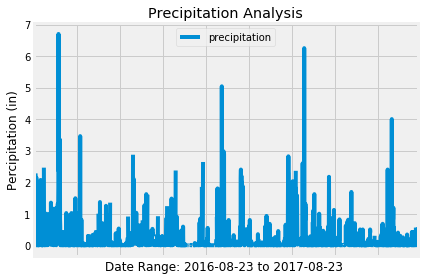

In [28]:
# Plotting background checks data
##ax1 = prcp_df.plot.line(x='date', y='prcp')
fig1 = plt.figure(figsize=(5,4))
rain_df.plot('date', 'prcp')
plt.grid(True)

plt.ylabel("Percipitation (in)", size=12)
plt.title("Precipitation Analysis")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xlabel('Date Range: ' + sd + ' to ' + last_date + ' ', size=12)
#plt.title('City Latitude vs. Max Temperature (' + time.strftime("%m/%d/%y") + ')')
plt.legend(['precipitation'],loc = 'upper center')
plt.tight_layout()
plt.savefig('PrecipitationAnalysis.png', bbox_inches="tight")
plt.show()

In [29]:
#DELETE BEFORE SUBMITTING FINAL VERSION
#year_back = dt.date(2017,8,23) - dt.timedelta(days=365)
#print(year_back)

#rain = session.query(Measurement.date,Measurement.prcp).\
#   filter(Measurement.date > year_back).\
#   order_by(Measurement.date).all()
#rain_df = pd.DataFrame(prcp, columns=['date','prcp'])
#rain_df.set_index('date').head()

In [30]:
#DELETE BEFORE SUBMITTING FINAL VERSION
## rain = []
## x =[]
## results = session.query(Measurement).filter(Measurement.date >= nd).filter(Measurement.date <= rf)#.\
##                 #order_by(Measurement.date.asc())
## for d in results:
##     x = d.date, d.prcp
##     rain.append(x)
##     #print(d.station, d.date, d.prcp, d.tobs)
## #rain

In [31]:
#DELETE BEFORE SUBMITTING FINAL VERSION
#rain

In [32]:
#DELETE BEFORE SUBMITTING FINAL VERSION
# Converting Raw Data to DataFrame
## df = pd.DataFrame(rain,
##                            columns=['Station', 'Date', 'Precipitation','TOBs'])

# Writing data to csv file
#weather_data.to_csv(output_data_file, header=True, index=True, index_label= 'Index')
## df.to_csv(output_data_file, header=True, index=True, index_label= 'Index')

In [33]:
#DELETE BEFORE SUBMITTING FINAL VERSION
# Converting Raw Data to DataFrame
#df = pd.DataFrame(rain, columns=['Date', 'Prcp'])

#df.set_index('Date')
#df.set_index('Date',inplace=True)


In [34]:
#DELETE BEFORE SUBMITTING FINAL VERSION
#list(df.columns) 

In [35]:
#DELETE BEFORE SUBMITTING FINAL VERSION
#df.head()

In [36]:
#DELETE BEFORE SUBMITTING FINAL VERSION
#sdf = df.sort_values(by=['Date'])
#sdf.head(10)
# Writing data to csv file
#df.to_csv(output_data_file, header=True, index=True, index_label= 'Index')

In [37]:
#DELETE BEFORE SUBMITTING FINAL VERSION
#date = df['Date']
#prcp = df('Prcp')
#date.head()

In [38]:
#df.plot.bar()

In [39]:
#DELETE BEFORE SUBMITTING FINAL VERSION
rex = session.query(Measurement).filter(Measurement.date == '2016-01-01').count()

#usa = session.query(BaseballPlayer).filter(BaseballPlayer.birth_country == 'USA').count()

In [40]:
#DELETE BEFORE SUBMITTING FINAL VERSION
rax = results.count()

In [41]:
#DELETE BEFORE SUBMITTING FINAL VERSION
rax

6

In [42]:
#DELETE BEFORE SUBMITTING FINAL VERSION
rex

6

In [43]:
#DELETE BEFORE SUBMITTING FINAL VERSION
#len(results)

In [44]:
#DELETE BEFORE SUBMITTING FINAL VERSION
x

('USC00516128', '2016-01-01', 0.0, 73.0)

In [45]:
#DELETE BEFORE SUBMITTING FINAL VERSION
# Create a DataFrame from the results: df
#df = pd.DataFrame(results)


In [46]:
#DELETE BEFORE SUBMITTING FINAL VERSION
#df.head()

In [47]:
#DELETE BEFORE SUBMITTING FINAL VERSION
last_12_mo = session.query(Measurement).\
    filter(Measurement.date >= '2016-01-01').filter(Measurement.date < '2017-01-01')
print(last_12_mo)

SELECT measurement.id AS measurement_id, measurement.station AS measurement_station, measurement.date AS measurement_date, measurement.prcp AS measurement_prcp, measurement.tobs AS measurement_tobs 
FROM measurement 
WHERE measurement.date >= ? AND measurement.date < ?


In [48]:
#DELETE BEFORE SUBMITTING FINAL VERSION
# Design a query to retrieve the last 12 months of precipitation data and plot the results
#SELECT * FROM employees
#WHERE hire_date >= '1986-01-01' 
#AND hire_date < '1987-01-01' 
#ORDER BY hire_date ASC;

In [49]:
#DELETE BEFORE SUBMITTING FINAL VERSION
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x112fdebd668>,
 'tobs': 65.0,
 'id': 1,
 'date': '2010-01-01',
 'prcp': 0.08,
 'station': 'USC00519397'}

In [50]:
#DELETE BEFORE SUBMITTING FINAL VERSION
last_row = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_row)


('2017-08-23',)


In [51]:
#DELETE BEFORE SUBMITTING FINAL VERSION
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x112fdf22e48>,
 'station': 'USC00519397',
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716}

In [52]:
#DELETE BEFORE SUBMITTING FINAL VERSION
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data

![precipitation](Images/precipitation.png)

In [53]:
# Use Pandas to calcualte the summary statistics for the precipitation data
pre_sort_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [54]:
#DELETE BEFORE SUBMITTING FINAL VERSION
rainx = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= nd).filter(Measurement.date <= rf)#.\
                #order_by(Measurement.date.asc())
rainx_df = pd.DataFrame(rainx, columns=['date','prcp'])
#rainx_df = prcp_df.sort_values(by=['date'])
#prcp_df.set_index('date').head()

rainx_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [55]:
#DELETE BEFORE SUBMITTING FINAL VERSION
#df.describe()

![describe](Images/describe.png)

In [56]:
# Design a query to show how many stations are available in this dataset?
tot_sta = session.query(Station).count()
print(tot_sta)

9


In [57]:
#DELETE BEFORE SUBMITTING FINAL VERSION
# Design a query to show how many stations are available in this dataset?
sta = session.query(Station)
print(f'There are {sta.count()} weather stations in total.')
for s in sta:
   # print(s.station, s.name, s.latitude, s.longitude, s.elevation)
    print(s.station, s.name)



There are 9 weather stations in total.
USC00519397 WAIKIKI 717.2, HI US
USC00513117 KANEOHE 838.1, HI US
USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US
USC00517948 PEARL CITY, HI US
USC00518838 UPPER WAHIAWA 874.3, HI US
USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US
USC00519281 WAIHEE 837.5, HI US
USC00511918 HONOLULU OBSERVATORY 702.2, HI US
USC00516128 MANOA LYON ARBO 785.2, HI US


In [58]:
#DELETE BEFORE SUBMITTING FINAL VERSION
nd

datetime.date(2016, 8, 23)

In [59]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_act_sta = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
                    order_by(func.count().desc()).all()

most_act_sta

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [60]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
most_active_station = most_act_sta[0][0]

most_active_temps = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),
                                  func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station).all()

most_active_temps

[(54.0, 85.0, 71.66378066378067)]

In [61]:
# Choose the station with the highest number of temperature observations.
most_temp_obs = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
                    order_by(func.count(Measurement.station).desc()).first()

most_temp_obs = most_temp_obs[0]

most_temp_obs

'USC00519281'

In [62]:
#DELETE BEFORE SUBMITTING FINAL VERSION
# Calculate the date 1 year ago from the last data point in the database
# Query for last date
end_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(end_date)

# Extracting just the last date from the returned list 'end_date'
last_date = end_date[0]
print(last_date)

# Converting string to datetime format
rf = datetime.strptime(last_date, '%Y-%m-%d').date()
print(rf)

# Subtracting 365 days
rng_start_date = rf - timedelta(days=365)
print(rng_start_date)

sd = str(rng_start_date)

('2017-08-23',)
2017-08-23
2017-08-23
2016-08-23


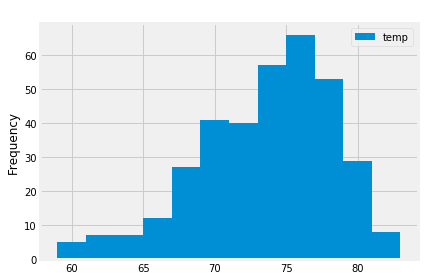

In [63]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
t_obs = session.query(Measurement.tobs).filter(Measurement.date >= sd).filter(Measurement.station == most_temp_obs).all()

t_obs_df = pd.DataFrame(t_obs, columns=['Temp'])

# ...and plot the results as a histogram

hist = t_obs_df.hist(bins=12)
plt.title(' ')
plt.legend(['temp'],loc = 'upper right')
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig('Temp_Histogram.png', bbox_inches="tight")
plt.show()

![precipitation](Images/station-histogram.png)

In [64]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [65]:
print(last_date)
print(sd)

2017-08-23
2016-08-23


In [66]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_days = calc_temps('2016-10-03', '2016-10-15')
trip_days[0]


(71.0, 77.78313253012048, 82.0)

In [67]:
tt_df = pd.DataFrame(trip_days, columns=['t_min', 't_avg', 't_max'])
tt_df

,t_min,t_avg,t_max
0,71.0,77.783133,82.0


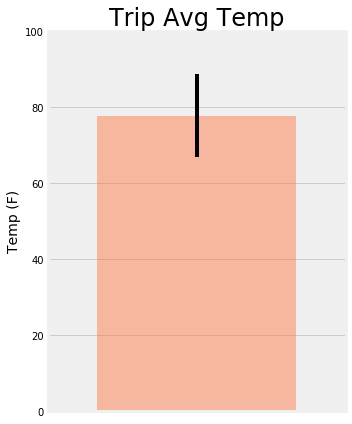

In [97]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

tt_df.plot.bar(y='t_avg',yerr=(tt_df['t_max']-tt_df['t_min']), color='coral', alpha=0.5, figsize=(5,6),width=1)
plt.grid(True)
plt.ylabel("Temp (F)", size=14)
plt.title("Trip Avg Temp", size=24)
plt.yticks(np.arange(0,101,20))
plt.xticks(np.arange(1, 1.0))
plt.gca().legend_.remove()
plt.tight_layout()
plt.savefig('Trip_Avg_Temp.png', bbox_inches="tight")
plt.show()

In [69]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

def rain_per_sta(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    fields = [Measurement.station,Station.name,Station.latitude,Station.longitude,Station.elevation]
    
    
    return session.query(*fields, func.sum(Measurement.prcp)).\
        filter(Measurement.station==Station.station).filter(Measurement.date >= start_date).\
        filter(Measurement.date <= end_date).group_by(Measurement.station).order_by(func.sum(Measurement.prcp).desc()).all()

# function usage example
print(rain_per_sta('2012-02-28', '2012-03-05'))

[('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 11.08), ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 10.32), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 5.79), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 3.8400000000000003), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 2.92), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 1.1800000000000002), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.76), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.03), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0)]


In [70]:
#DELETE BEFORE SUBMITTING FINAL VERSION
# Query to determine how many stations are available in this timeframe
sta = session.query(Station).filter(Measurement.station==Station.station).filter(Measurement.date >= '2016-10-03').\
        filter(Measurement.date <= '2016-10-15').all()
#print(f'There are {sta.count()} weather stations in total.')
for s in sta:
   # print(s.station, s.name, s.latitude, s.longitude, s.elevation)
    print(s.station, s.name)


USC00519397 WAIKIKI 717.2, HI US
USC00513117 KANEOHE 838.1, HI US
USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US
USC00517948 PEARL CITY, HI US
USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US
USC00519281 WAIHEE 837.5, HI US
USC00516128 MANOA LYON ARBO 785.2, HI US


In [71]:
print(rain_per_sta('2016-10-03', '2016-10-15'))

[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 5.579999999999999), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.55), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.14), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.11000000000000001), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.07), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


## Optional Challenge Assignment

In [72]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [73]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
# Set the start and end date of the trip
# Use the start and end date to create a range of dates
# Stip off the year and save a list of %m-%d strings
# Loop through the list of %m-%d strings and calculate the normals for each date

start_date='2016-10-03'
end_date='2016-10-15'

s_d = datetime.strptime(start_date, '%Y-%m-%d').date()
e_d = datetime.strptime(end_date, '%Y-%m-%d').date()

s_dx = datetime.strftime(s_d,'%m-%d')
s_dx
s_d


datetime.date(2016, 10, 3)

In [74]:
#DELETE BEFORE SUBMITTING FINAL VERSION
turtle = tuple(daily_normals(s_dx))
zx = turtle[0]
zx

(66.0, 76.73076923076923, 84.0)

In [75]:
#DELETE BEFORE SUBMITTING FINAL VERSION
df = pd.DataFrame(zx)
df

,0
0,66.000000
1,76.730769
2,84.000000


In [76]:
# Determining the number of days to count
x_d = e_d - s_d
x_d

rng_days = x_d.days

rng_days

12

In [77]:
# Creating usable list for daily_normals function and final area plot
trip_days_list = []
tdl_full_date = []
i=0
date = s_d - timedelta(days=1)
for i in range(rng_days + 1):
    date = date + timedelta(days=1)
    strip_day = datetime.strftime(date,'%m-%d')
    trip_days_list.append(strip_day)
    strip_day_full = datetime.strftime(date,'%Y-%m-%d')
    tdl_full_date.append(strip_day_full)

t_d_l = trip_days_list
print(t_d_l)
print(tdl_full_date)

['10-03', '10-04', '10-05', '10-06', '10-07', '10-08', '10-09', '10-10', '10-11', '10-12', '10-13', '10-14', '10-15']
['2016-10-03', '2016-10-04', '2016-10-05', '2016-10-06', '2016-10-07', '2016-10-08', '2016-10-09', '2016-10-10', '2016-10-11', '2016-10-12', '2016-10-13', '2016-10-14', '2016-10-15']


In [78]:
# Creating lists from the data to use in df
tmin = []
tavg = []
tmax = []

d_norm = []

for day_n in t_d_l:
    da_norm = tuple(daily_normals(day_n))
    zx = da_norm[0]
    tmin.append(zx[0])
    tavg.append(zx[1])
    tmax.append(zx[2])

print(tmin)
print(tavg)
print(tmax)

[66.0, 67.0, 67.0, 70.0, 68.0, 66.0, 69.0, 69.0, 69.0, 65.0, 65.0, 67.0, 67.0]
[76.73076923076923, 75.86274509803921, 76.16666666666667, 75.42, 75.6078431372549, 76.3265306122449, 76.11363636363636, 75.85416666666667, 76.57142857142857, 75.75510204081633, 75.98039215686275, 75.1923076923077, 75.63461538461539]
[84.0, 82.0, 84.0, 81.0, 81.0, 86.0, 84.0, 83.0, 84.0, 82.0, 84.0, 82.0, 82.0]


In [79]:
# Creating daily normals dataframe
df = pd.DataFrame({'date':tdl_full_date,
                   'tmin':tmin,
                   'tavg':tavg,
                   'tmax':tmax}, )
df

df.set_index('date').head(2)

,tmin,tavg,tmax
date,,,
2016-10-03,66.0,76.730769,84.0
2016-10-04,67.0,75.862745,82.0


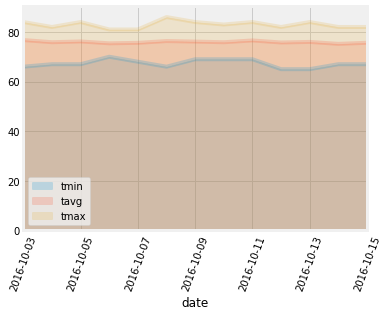

In [110]:
# Plotting data with an area plot
ax = df.plot.area(stacked=False, x='date', alpha=0.2, figsize=(5.5,4.5))
plt.xticks(rotation=70)
plt.tight_layout()
plt.savefig('Daily_normals.png', bbox_inches="tight")

plt.show()

In [81]:
#DELETE BEFORE SUBMITTING FINAL VERSION
nd = rf - timedelta(days=365)
print(nd)

2016-08-23


In [82]:
#DELETE BEFORE SUBMITTING FINAL VERSION
# Query for last date
end_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(end_date)

# Extracting just the last date from the returned list 'end_date'
last_date = end_date[0]
print(last_date)

# Converting string to datetime format
rf = datetime.strptime(last_date, '%Y-%m-%d').date()
print(rf)

# Subtracting 365 days
rng_start_date = rf - timedelta(days=365)
print(rng_start_date)

sd = str(rng_start_date)

('2017-08-23',)
2017-08-23
2017-08-23
2016-08-23


In [83]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [84]:
# Plot the daily normals as an area plot with `stacked=False`


In [85]:
#DELETE BEFORE SUBMITTING FINAL VERSION
rain = []
x =[]
results = session.query(Measurement).filter(Measurement.date == '2016-01-01')
for d in results:
    x = d.station, d.date, d.prcp, d.tobs
    rain.append(x)
    print(rain)

[('USC00519397', '2016-01-01', 0.0, 62.0)]
[('USC00519397', '2016-01-01', 0.0, 62.0), ('USC00513117', '2016-01-01', 0.02, 63.0)]
[('USC00519397', '2016-01-01', 0.0, 62.0), ('USC00513117', '2016-01-01', 0.02, 63.0), ('USC00514830', '2016-01-01', 0.0, 73.0)]
[('USC00519397', '2016-01-01', 0.0, 62.0), ('USC00513117', '2016-01-01', 0.02, 63.0), ('USC00514830', '2016-01-01', 0.0, 73.0), ('USC00519523', '2016-01-01', 0.0, 64.0)]
[('USC00519397', '2016-01-01', 0.0, 62.0), ('USC00513117', '2016-01-01', 0.02, 63.0), ('USC00514830', '2016-01-01', 0.0, 73.0), ('USC00519523', '2016-01-01', 0.0, 64.0), ('USC00519281', '2016-01-01', 0.02, 74.0)]
[('USC00519397', '2016-01-01', 0.0, 62.0), ('USC00513117', '2016-01-01', 0.02, 63.0), ('USC00514830', '2016-01-01', 0.0, 73.0), ('USC00519523', '2016-01-01', 0.0, 64.0), ('USC00519281', '2016-01-01', 0.02, 74.0), ('USC00516128', '2016-01-01', 0.0, 73.0)]


#from sqlalchemy import func
session.query(Measurement.column, func.count(Measurement.column)).group_by(Measurement.column).all()

from sqlalchemy import func
session.query(Table.column, func.count(Table.column)).group_by(Table.column).all()

q = session.query(Measurement).join(Station, Station.station==Measurement.station)
for j in q:
    print(j.station, j.date, j.prcp, j.tobs)

prcp = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= nd).filter(Measurement.date <= rf)#.\
                #order_by(Measurement.date.asc())